In [1]:
import numpy as np
import collections

import matplotlib.pyplot as plt
from pymir import mpl_stylesheet
from pymir import mpl_utils
mpl_stylesheet.banskt_presentation(splinecolor = 'black', dpi = 120)

from gradvi.tests import toy_data
from gradvi.tests import toy_priors
from gradvi.inference import Trendfiltering
from gradvi.models import basis_matrix as gvbm
from gradvi.optimize import moving_average as gvma

from mrashpen.utils import R_trendfilter

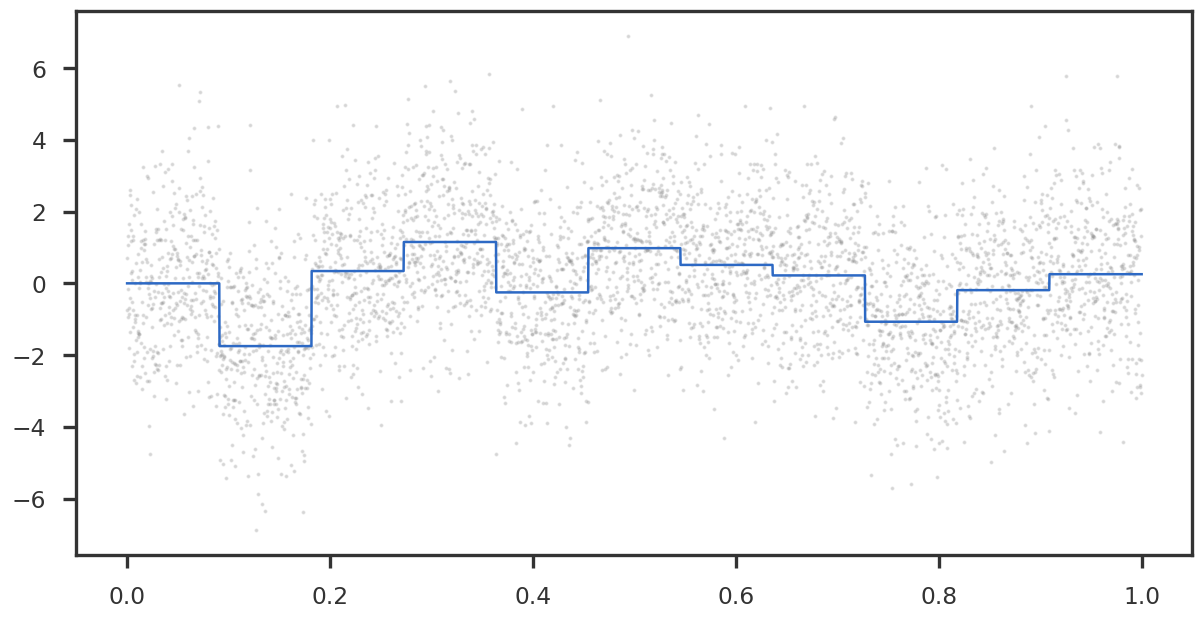

In [10]:
np.random.seed(100)

n = 4096
data = dict()
degree = 0
nknots = 10
strue  = 1.6
knots  = np.linspace(0, 1, nknots+2)[1:-1]

x = np.linspace(0, 1, n)
data = toy_data.changepoint_from_bspline(x, knots, strue, degree = degree, 
                signal = "normal", seed = 100,
                include_intercept = False)

fig = plt.figure(figsize = (12, 6))
ax1 = fig.add_subplot(111)
ax1.scatter(data.x, data.y, s = 2, color = 'grey', alpha = 0.2)
ax1.plot(data.x, data.ytrue)
plt.show()

In [11]:
data.snr

0.5679080689575408

In [12]:
signal = np.sum(np.square(np.diff(data.ytrue))) / nknots
noise  = np.var(data.y - data.ytrue)
signal / noise

0.5398884191136425

In [13]:
tf_y, tf_fit = R_trendfilter.fit(data.y, order = degree)

Fold 1 ... Fold 2 ... Fold 3 ... Fold 4 ... Fold 5 ... 



In [14]:
prior_init = toy_priors.get_ash(k = 20, sparsity = None, skbase = 2.0, skfactor = 10.0)
gv1 = Trendfiltering(maxiter = 20000, standardize_basis = False, standardize = True)
#gv1.fit(data.y, degree, prior_init)
gv1.fit(data.y, degree, prior_init, y_init = tf_y)

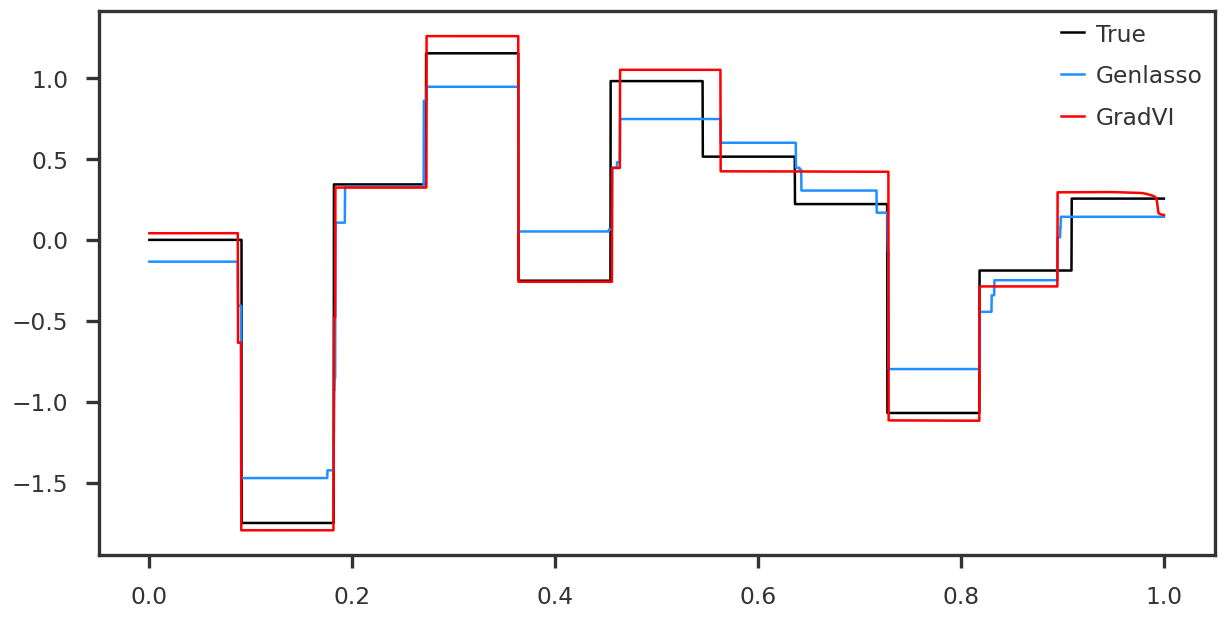

In [16]:
fig = plt.figure(figsize = (12, 6))
ax1 = fig.add_subplot(111)
#ax1.scatter(data.x, data.y, s = 2, color = 'grey', alpha = 0.1)
ax1.plot(data.x, data.ytrue, label = 'True', color = 'black')
ax1.plot(data.x, tf_y, label = 'Genlasso', color = 'dodgerblue')
ax1.plot(data.x, gv1.ypred, label = 'GradVI', color = 'red')

ax1.legend()

#fig.savefig("trendfiltering_example_gamma_large_se.pdf", bbox_inches = 'tight')
plt.show()